In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
import pandas as pd

In [3]:
IN_PATH: str = '../results/manifolds/_raw'
OUT_PATH: str = '../results/manifolds'

In [4]:
DATASETS: list = ['train', 'test']

In [5]:
MODELS: list = ['base', 'textattack', 'fabriceyhc', 'wakaka']

In [6]:
COLS_OF_INTEREST: list = ['mean', 'std', 'min', 'max']

In [7]:
### Load Datasets into memory

In [8]:
def convert_to_multi_col(df:pd.DataFrame, meta_col: str) -> pd.DataFrame:
    df.columns = pd.MultiIndex.from_product([[meta_col], df.columns], names=['model', 'metrics'])

    return df

In [9]:
analysis: dict = {
    data: pd.concat(
        [(
            pd
            .read_csv(f'{IN_PATH}/{data}.{model}.csv', index_col=0, )
            .set_index(['dim'])
            .pipe(convert_to_multi_col, model)
        )
            for model in MODELS],
        axis=1)
    for data in DATASETS
}

In [10]:
for label, data in analysis.items():
    display(label, data)

'train'

model                                                 base  \
metrics                  centroid_point_distances_negative   
dim                                                          
768      [[5.992325561399737, 5.203575077395552, 3.5995...   
576      [[5.996025787793756, 5.204297607458222, 3.5977...   
384      [[5.9950683167181475, 5.2000115246079375, 3.60...   
192      [[5.993595485583582, 5.20549469507963, 3.59324...   
96       [[5.993357711694206, 5.215632068707258, 3.5688...   
48       [[5.954633792753074, 5.186424357522261, 3.5808...   
24       [[5.990346925273335, 5.179033716094098, 3.5357...   
12       [[5.830375948686592, 5.133567925300488, 3.4097...   
6        [[5.908934528837689, 4.941959055538326, 3.3603...   
3        [[5.863928605303749, 4.771816430487086, 2.8127...   

model                            \
metrics intra_distance_negative   
dim                               
768                    5.764313   
576                    5.765689   
384                    5.765270   
192                    5.763429   
96                     5.760440   
48                     5.753020   
24                     5.739054   
12                     5.698780   
6                      5.625368   
3                      5.447228   

model                                                       \
metrics                  centroid_point_distances_positive   
dim                                                          
768      [[6.28652306558972, 3.8467728310963367, 5.1201...   
576      [[6.306355161307022, 3.827552220961076, 5.1404...   
384      [[6.3075686497299275, 3.8259540010354423, 5.14...   
192      [[6.297136301482993, 3.823790245628511, 5.1249...   
96       [[6.289576579087522, 3.8131488528701585, 5.132...   
48       [[6.2668352693772675, 3.7880470567407345, 5.10...   
24       [[6.309184102834411, 3.6725690582193438, 5.038...   
12       [[5.99065614517058, 3.417830585033947, 4.99785...   
6        [[6.182844579317592, 3.372902631016196, 4.9754...   
3        [[6.039240495253037, 3.1007884964652375, 4.914...   

model                                           \
metrics intra_distance_positive extra_distance   
dim                                              
768                    6.138071       1.259246   
576                    6.139723       1.192546   
384                    6.139276       1.196112   
192                    6.137846       1.217420   
96                     6.135166       1.240186   
48                     6.128055       1.311714   
24                     6.116245       1.393252   
12                     6.080710       1.683567   
6                      6.032015       1.775144   
3                      5.966240       1.331890   

model                                           textattack  \
metrics                  centroid_point_distances_negative   
dim                                                          
768      [[6.751666973990453, 7.309737450435016, 5.0174...   
576      [[6.748882274359678, 7.308275882946879, 5.0156...   
384      [[6.751172973485324, 7.303235186143327, 5.0183...   
192      [[6.742234892475699, 7.303618564588197, 5.0091...   
96       [[6.7289904552518545, 7.30602828146084, 5.0071...   
48       [[6.721476277262578, 7.32081171455907, 4.97311...   
24       [[6.694783208077926, 7.294728596213203, 4.9343...   
12       [[6.586341426764218, 7.259178095696977, 4.8346...   
6        [[6.505520843604145, 7.145501260977879, 4.6809...   
3        [[6.352945956520121, 7.267746844344551, 4.2223...   

model                            \
metrics intra_distance_negative   
dim                               
768                    6.738079   
576                    6.736454   
384                    6.735642   
192                    6.733450   
96                     6.728194   
48                     6.716355   
24                     6.691829   
12                     6.632838   
6                      6.481996   
3                      5.987401   

model           

'test'

model                                                 base  \
metrics                  centroid_point_distances_negative   
dim                                                          
768      [[4.832424433221461, 9.807014103979695, 3.7882...   
576      [[4.857584202387957, 9.803425183820583, 3.7994...   
384      [[4.842403996381646, 9.809672664107785, 3.7992...   
192      [[4.844491548834659, 9.798123423354937, 3.8110...   
96       [[4.829165741727322, 9.798665305208734, 3.8019...   
48       [[4.818739968202357, 9.815831903839557, 3.7931...   
24       [[4.756308977278866, 9.846593434122601, 3.7500...   
12       [[4.7055086554457235, 9.864262031975592, 3.732...   
6        [[4.6075001047767685, 9.993579902961208, 3.570...   
3        [[4.3191808667638005, 10.021234667804832, 2.21...   

model                            \
metrics intra_distance_negative   
dim                               
768                    5.798742   
576                    5.800300   
384                    5.799821   
192                    5.798409   
96                     5.795152   
48                     5.788041   
24                     5.773110   
12                     5.740305   
6                      5.683431   
3                      5.502366   

model                                                       \
metrics                  centroid_point_distances_positive   
dim                                                          
768      [[5.229993597663103, 4.427183632815254, 5.6675...   
576      [[5.244652511383654, 4.434598608281722, 5.6629...   
384      [[5.236031814307266, 4.423988303937034, 5.6673...   
192      [[5.243993025407797, 4.44447063363301, 5.66963...   
96       [[5.238013336477926, 4.414441139088248, 5.6662...   
48       [[5.230589880993264, 4.363224339109323, 5.6586...   
24       [[5.224209636410473, 4.248390810288339, 5.6051...   
12       [[5.096355093523735, 4.042178929393498, 5.5828...   
6        [[5.131974528669825, 3.9663853588780347, 5.401...   
3        [[5.398405494344717, 3.9306227788356214, 5.530...   

model                                           \
metrics intra_distance_positive extra_distance   
dim                                              
768                    6.084546       1.229414   
576                    6.086527       1.155253   
384                    6.086148       1.159657   
192                    6.084642       1.175694   
96                     6.081736       1.206178   
48                     6.074287       1.275480   
24                     6.058632       1.414432   
12                     6.026544       1.602858   
6                      5.984994       1.587428   
3                      5.905651       1.125104   

model                                           textattack  \
metrics                  centroid_point_distances_negative   
dim                                                          
768      [[6.785032081639631, 9.407629650697947, 6.6619...   
576      [[6.779536191214544, 9.41776701364831, 6.65294...   
384      [[6.7785795797701685, 9.415618021401256, 6.645...   
192      [[6.780360672022861, 9.416920108781547, 6.6427...   
96       [[6.756564705335728, 9.415114747955064, 6.6380...   
48       [[6.739369060110247, 9.428266530780187, 6.6277...   
24       [[6.7217286079158445, 9.427964840942984, 6.567...   
12       [[6.681649376094264, 9.485387738639064, 6.4452...   
6        [[6.492252243435274, 9.453562554841263, 6.2162...   
3        [[5.954055978611677, 9.566833023895972, 5.6215...   

model                            \
metrics intra_distance_negative   
dim                               
768                    6.935167   
576                    6.933637   
384                    6.933104   
192                    6.930785   
96                     6.926389   
48                     6.915305   
24                     6.892961   
12                     6.840971   
6                      6.697809   
3                      6.220358   

model           

In [11]:
### Calculate Centroid Distance and Cluster Dispersion

In [12]:
extra_distances: dict = {
    label: (
        data
        .filter(regex=".*extra_distance")
        .describe()
        .T
    )
    for label, data in analysis.items()
}

In [13]:
for label, data in extra_distances.items():
    formatted: pd.DataFrame = (
        data
        [COLS_OF_INTEREST]
        .round(3)
    )
    formatted.to_csv(f'{OUT_PATH}/{label}.metric.extra_distances.csv')
    formatted.style.to_latex(f'{OUT_PATH}/_tex/{label}.metric.extra_distances.tex')
    display(label, formatted)
    # print(formatted.to_markdown())

'train'

,,mean,std,min,max
model,metrics,,,,
base,extra_distance,1.360,0.206,1.193,1.775
textattack,extra_distance,8.053,0.424,7.820,9.156
fabriceyhc,extra_distance,22.890,0.059,22.865,23.053
wakaka,extra_distance,11.629,0.286,11.483,12.393


'test'

,,mean,std,min,max
model,metrics,,,,
base,extra_distance,1.293,0.179,1.125,1.603
textattack,extra_distance,7.554,0.444,7.313,8.711
fabriceyhc,extra_distance,19.999,0.085,19.964,20.239
wakaka,extra_distance,11.550,0.293,11.398,12.325


In [14]:
intra_distance: dict = {
    label: (
        data
        .filter(regex=".*intra_distance")
        .describe()
        .T
    )
    for label, data in analysis.items()
}

In [15]:
for label, data in intra_distance.items():
    formatted: pd.DataFrame = (
        data
        [['mean', 'std', 'min', 'max']]
        .round(3)
    )
    formatted.to_csv(f'{OUT_PATH}/{label}.metric.intra_distance.csv')
    formatted.style.to_latex(f'{OUT_PATH}/_tex/{label}.metric.intra_distance.tex')
    display(label, formatted)
    # print(formatted.to_markdown())

'train'

mean    std    min    max
model      metrics                                            
base       intra_distance_negative  5.708  0.102  5.447  5.766
           intra_distance_positive  6.101  0.059  5.966  6.140
textattack intra_distance_negative  6.618  0.236  5.987  6.738
           intra_distance_positive  6.998  0.240  6.351  7.118
fabriceyhc intra_distance_negative  7.596  0.103  7.314  7.644
           intra_distance_positive  5.980  0.142  5.584  6.041
wakaka     intra_distance_negative  7.335  0.209  6.768  7.437
           intra_distance_positive  8.459  0.207  7.901  8.562

'test'

mean    std    min    max
model      metrics                                            
base       intra_distance_negative  5.748  0.094  5.502  5.800
           intra_distance_positive  6.047  0.060  5.906  6.087
textattack intra_distance_negative  6.823  0.224  6.220  6.935
           intra_distance_positive  7.060  0.246  6.399  7.184
fabriceyhc intra_distance_negative  9.229  0.103  8.941  9.273
           intra_distance_positive  7.376  0.141  6.985  7.438
wakaka     intra_distance_negative  7.481  0.203  6.933  7.581
           intra_distance_positive  8.336  0.221  7.746  8.447

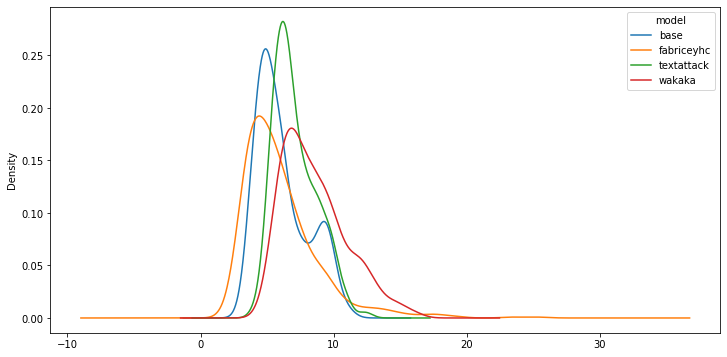

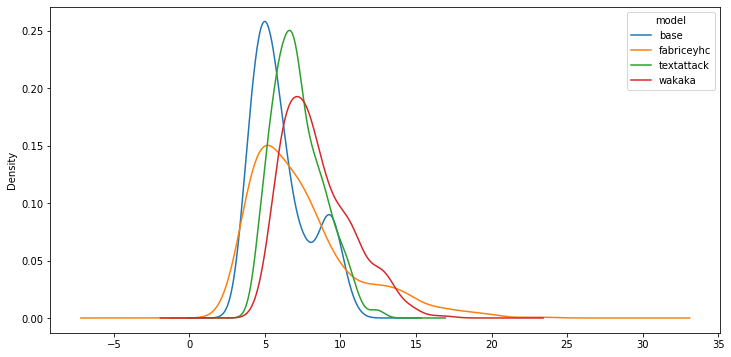

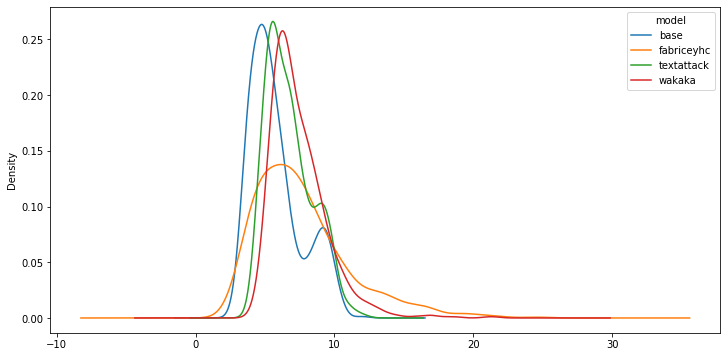

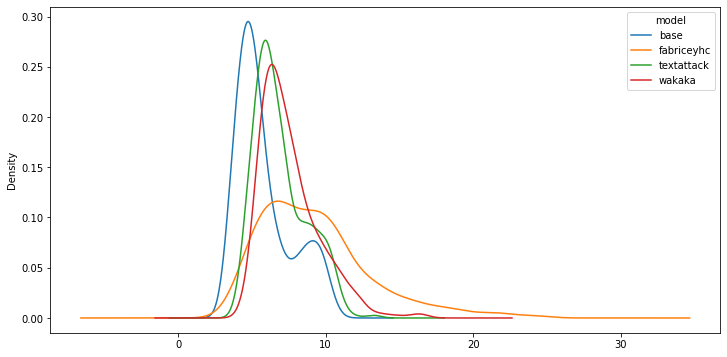

In [16]:
from ast import literal_eval

for group in ['positive', 'negative']:
    for label, data in analysis.items():
        formatted = (
            data
            .filter(regex=f"centroid_point_distances_{group}")
            .iloc[0]
            .unstack()
            .applymap(literal_eval)
            .applymap(lambda x: x[0])
            .T
            .apply(pd.Series.explode)
            .plot.kde()
        )
        plt.savefig(f'{OUT_PATH}/{group}.{label}.density.png')